In [1]:
import cgeniepy
from cgeniepy.model import GenieModel
from cgeniepy.array import GriddedData

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

pi_model = cgeniepy.sample_model()
k_model =GenieModel('../model/muffin.u067bc.PO4Fe.main', gemflag=['biogem'])

/Users/yingrui/cgeniepy/src/cgeniepy/model.py:53: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")


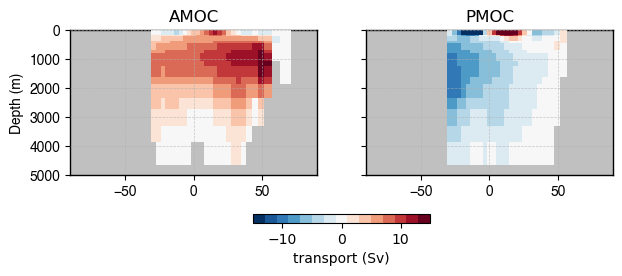

In [2]:
## plot AMOC and PMOC
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5), sharex=True, sharey=True,
                       )

cmap = plt.get_cmap('RdBu_r', 15)
p = pi_model.get_var("phys_opsia").isel(time=-1).plot(ax=ax[0], cmap=cmap, colorbar=False, vmin=-15, vmax=15)
pi_model.get_var("phys_opsip").isel(time=-1).plot(ax=ax[1], cmap=cmap, colorbar=False, vmin=-15, vmax=15)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("Depth (m)")
ax[1].set_ylabel("")
ax[0].set_title("AMOC")
ax[1].set_title("PMOC")
ax[0].set_ylim(5000, 0)

## add colorbar
# add one shared vertical colorbar for both subplots
cbar = fig.colorbar(
    p,                       # the mappable returned by .plot()
    ax=ax,                   # give it the list of both axes
    orientation='horizontal',  # or 'horizontal'
    fraction=0.046,          # size of colorbar as fraction of plot height
    pad=0.2,                # space between plot and colorbar
)
cbar.set_label('transport (Sv)')  # adjust label to your unit
fig.savefig("../output/pi_circulation.png", dpi=300, bbox_inches='tight')

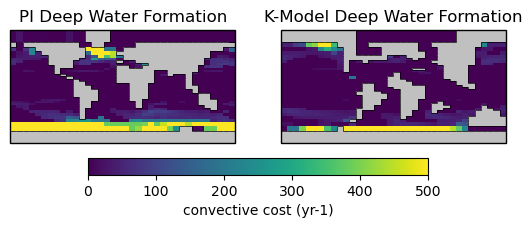

In [3]:
## deep water formation
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()})
pi_model.get_var("phys_cost").isel(time=-1).plot(colorbar=False, vmax=500, ax=axs[0], outline=True)
p = k_model.get_var("phys_cost").isel(time=-1).plot(colorbar=False, vmax=500, ax=axs[1], outline=True)

## add
axs[0].set_title("PI Deep Water Formation")
axs[1].set_title("K-Model Deep Water Formation")

# add a single, shared colorbar
cbar = fig.colorbar(
    p,            # mappable from the first plot
    ax=axs,          # span both axes
    orientation='horizontal',
    fraction=0.046,  # size of bar relative to plot
    pad=0.04         # space between plots and bar
)
cbar.set_label("convective cost (yr-1)")
fig.savefig("../output/deep_water_formation.png", dpi=300, bbox_inches='tight')

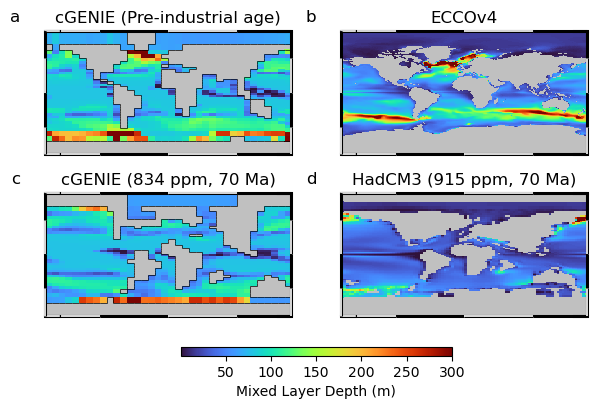

In [8]:
## MLD 
#Valdes 2021 CP: texyoo
#Scotes_07: tfkeoo.pgclann.nc
hadcm3_k = xr.open_dataset("../data/tfkeoo.pgclann.nc", decode_times=False) 
mld = hadcm3_k['mixLyrDpth_ym_uo'][0][0]
hdcm3_mld = GriddedData(mld.where(mld > 0, np.nan))


pi_data = xr.open_dataset("../data/eccov4_mld_clim.nc")
pi_data = GriddedData(pi_data['MXLDEPTH'])
#
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(7,5))

cmap= plt.get_cmap('turbo')

p = pi_model.get_var("phys_MLD").isel(time=-1).plot(colorbar=False, vmax=300, ax=axs[0,0], cmap=cmap, outline=True, zebra_frame=True)
pi_data.plot(colorbar=False, vmax=300, ax=axs[0,1], cmap=cmap,zebra_frame=True)

k_model.get_var("phys_MLD").isel(time=-1).plot(colorbar=False, vmax=300, ax=axs[1,0], cmap=cmap, outline=True,zebra_frame=True)

hdcm3_mld.plot(vmax=300, ax=axs[1,1], cmap=cmap, zebra_frame=True, colorbar=False)

## add colorbars
cbar = fig.colorbar(p, ax=axs, orientation='horizontal', pad=0.08, shrink=0.5, aspect=30)

cbar.set_label("Mixed Layer Depth (m)")

axs[0,1].set_title("ECCOv4")
axs[0,0].set_title("cGENIE (Pre-industrial age)")
axs[1,0].set_title("cGENIE (834 ppm, 70 Ma)")
axs[1,1].set_title("HadCM3 (915 ppm, 70 Ma)")

## add alphabetic labels
for i, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.05, chr(97 + i), transform=ax.transAxes, fontsize=12, va='bottom', ha='right')

fig.savefig("../output/mld_comparison.png", dpi=300, bbox_inches='tight')